<a href="https://colab.research.google.com/github/NevesJulio/Exercicios_DL/blob/main/Exerc%C3%ADcioDL_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --output cleaned.ipynb nome_do_notebook.ipynb


[NbConvertApp] WARNING | pattern 'nome_do_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

In [9]:
from torch import nn
# Definindo o mesmo modelo anterior, mas agora como uma classe
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out


## 5. Datasets e DataLoaders


In [10]:
from torch.utils.data import Dataset

# Exemplo prático de um Dataset customizado com tensores
class SimpleTensorDataset(Dataset):
    def __init__(self, features_tensor, labels_tensor):
        self.features = features_tensor
        self.labels = labels_tensor

    def __len__(self):
        # Retorna o número total de amostras
        return self.features.size(0)

    def __getitem__(self, idx):
        # Retorna uma tupla (feature, label) para um dado índice
        feature_sample = self.features[idx]
        label_sample = self.labels[idx]
        return feature_sample, label_sample

# Criando dados de exemplo
features = torch.randn(500, 64) # 500 amostras, 64 features cada
labels = torch.randint(0, 2, (500,)) # 500 rótulos (0 ou 1)

# Instanciando o nosso dataset customizado
custom_dataset = SimpleTensorDataset(features, labels)

# Verificando a implementação dos métodos
print(f"Tamanho total do dataset: {len(custom_dataset)}")

Tamanho total do dataset: 500


In [11]:
from torch.utils.data import DataLoader

# Agora, usamos o DataLoader com o 'custom_dataset' que criamos anteriormente
data_loader = DataLoader(dataset=custom_dataset, batch_size=10, shuffle=True)

# O DataLoader é um iterável. Podemos usá-lo em um laço 'for' ou com 'next(iter())'
# para obter o próximo lote de dados.
first_batch_features, first_batch_labels = next(iter(data_loader))

print(f"Formato do batch de features: {first_batch_features.shape}")
print(f"Formato do batch de rótulos: {first_batch_labels.shape}")

Formato do batch de features: torch.Size([10, 64])
Formato do batch de rótulos: torch.Size([10])


### Datasets Disponibilizados: `torchvision`

Compreendida a estrutura de um `Dataset` e o papel do `DataLoader`, podemos apreciar a conveniência de bibliotecas como a `torchvision`. Ela já fornece implementações prontas da classe `Dataset` para datasets populares como o MNIST, que seguem a mesma estrutura que acabamos de ver.

In [12]:
import torchvision
import torchvision.transforms as transforms

# Definindo transformações para os dados
# ToTensor() converte a imagem PIL (H x W x C) no intervalo [0, 255]
# para um FloatTensor (C x H x W) no intervalo [0.0, 1.0].
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # Média e desvio padrão do MNIST
])

# Baixando o dataset de treino
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

# Baixando o dataset de teste
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.10MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.39MB/s]


In [13]:
# Criando os DataLoaders
batch_size = 128
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# Iterando sobre o DataLoader para ver o formato de um batch
images, labels = next(iter(train_loader))
print(f"Formato do batch de imagens: {images.shape}") # (batch_size, channels, height, width)
print(f"Formato do batch de rótulos: {labels.shape}")

Formato do batch de imagens: torch.Size([128, 1, 28, 28])
Formato do batch de rótulos: torch.Size([128])


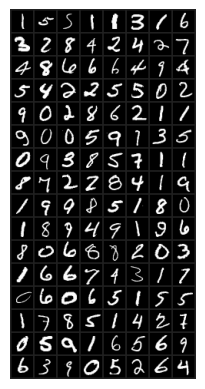

Rótulos:  1 5 5 1 1 3 1 6 3 2 8 4 2 4 2 7 4 8 6 6 6 4 9 4 5 4 2 2 5 5 0 2 9 0 2 8 6 2 1 1 9 0 0 5 9 1 3 5 0 9 3 8 5 7 1 1 8 7 2 2 8 4 1 9 1 9 9 8 5 1 8 0 1 8 9 4 9 1 9 6 8 0 6 8 8 2 0 3 1 6 6 7 4 3 1 7 0 6 0 6 5 1 5 5 1 7 8 5 1 4 2 7 0 5 9 1 6 5 6 9 6 3 9 0 5 2 6 4


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Função para exibir uma imagem
def imshow(img):
    # A normalização precisa ser revertida para a visualização correta
    # Média = 0.1307, Desvio Padrão = 0.3081
    img = img * 0.3081 + 0.1307
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off') # Remove os eixos
    plt.show()

# Pega um lote (batch) de imagens de treino
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostra as imagens em uma grade
# O make_grid organiza o lote de imagens em uma única imagem-grade
imshow(torchvision.utils.make_grid(images))

# Imprime os rótulos correspondentes
print('Rótulos: ', ' '.join(f'{labels[j].item()}' for j in range(batch_size)))

## 6. Funções de Custo (Loss Functions)


In [15]:
# Instanciando a função de custo para classificação multiclasse
loss_function = nn.CrossEntropyLoss()

# Exemplo de uso:
# Saída do modelo (logits) para um batch de 3 amostras e 10 classes
output_logits = torch.randn(3, 10)
# Rótulos verdadeiros
target_labels = torch.tensor([1, 4, 9]) # Classe 1, Classe 4, Classe 9

# Calculando a perda
loss = loss_function(output_logits, target_labels)
print(f"Valor da perda (loss): {loss.item()}")

Valor da perda (loss): 2.679060220718384


## 7. Otimizadores


In [16]:
# Instanciando o modelo
learning_rate = 0.001
model = NeuralNetwork(input_size=784, hidden_size=128, num_classes=10)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## 8. Treinamento: O Ciclo Completo



In [17]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Hiperparâmetros
num_epochs = 5
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
learning_rate = 0.001

# Dispositivo (GPU se disponível, senão CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando o dispositivo: {device}")

# Instanciando o modelo, função de custo e otimizador e movendo o modelo para o dispositivo
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Listas para armazenar as métricas de cada época
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Loop de treinamento
for epoch in range(num_epochs):
    # --- Treinamento ---
    model.train() # Coloca o modelo em modo de treinamento
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    progress_bar_train = tqdm(train_loader, desc=f'Época [{epoch+1}/{num_epochs}] Treino')

    for images, labels in progress_bar_train:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calcula a acurácia de treino
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        progress_bar_train.set_postfix({'Perda Treino': f'{loss.item():.4f}'})

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # --- Validação ---
    model.eval() # Coloca o modelo em modo de avaliação
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    progress_bar_val = tqdm(test_loader, desc=f'Época [{epoch+1}/{num_epochs}] Validação')

    with torch.no_grad(): # Desabilita o cálculo de gradientes
        for images, labels in progress_bar_val:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            # Calcula a acurácia de validação
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            progress_bar_val.set_postfix({'Perda Val': f'{loss.item():.4f}'})

    epoch_val_loss = running_val_loss / len(test_loader)
    epoch_val_acc = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f'Fim da Época [{epoch+1}/{num_epochs}] | '
          f'Perda Treino: {epoch_train_loss:.4f}, Acurácia Treino: {epoch_train_acc:.2f}% | '
          f'Perda Validação: {epoch_val_loss:.4f}, Acurácia Validação: {epoch_val_acc:.2f}%')

print("\nTreinamento concluído!")

Usando o dispositivo: cpu


Época [1/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [1/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [1/5] | Perda Treino: 0.2379, Acurácia Treino: 92.91% | Perda Validação: 0.1188, Acurácia Validação: 96.47%


Época [2/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [2/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [2/5] | Perda Treino: 0.0921, Acurácia Treino: 97.20% | Perda Validação: 0.0867, Acurácia Validação: 97.36%


Época [3/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [3/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [3/5] | Perda Treino: 0.0613, Acurácia Treino: 98.16% | Perda Validação: 0.0731, Acurácia Validação: 97.62%


Época [4/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [4/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [4/5] | Perda Treino: 0.0418, Acurácia Treino: 98.68% | Perda Validação: 0.0857, Acurácia Validação: 97.63%


Época [5/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [5/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [5/5] | Perda Treino: 0.0322, Acurácia Treino: 98.92% | Perda Validação: 0.0630, Acurácia Validação: 98.11%

Treinamento concluído!


### Visualização das Curvas de Aprendizado

As curvas de aprendizado plotam as métricas de desempenho (como perda e acurácia) para os conjuntos de treinamento e validação ao longo das épocas. Elas são ferramentas de diagnóstico essenciais:

-   **Curva de Perda (Loss Curve)**: Mostra a evolução da função de custo. Idealmente, ambas as perdas (treino e validação) devem diminuir. Se a perda de validação começar a aumentar enquanto a de treino continua caindo, é um sinal claro de *overfitting*.
-   **Curva de Acurácia (Accuracy Curve)**: Mostra a evolução da acurácia. Idealmente, ambas devem aumentar e convergir. Uma grande diferença entre a acurácia de treino e a de validação também indica *overfitting*.

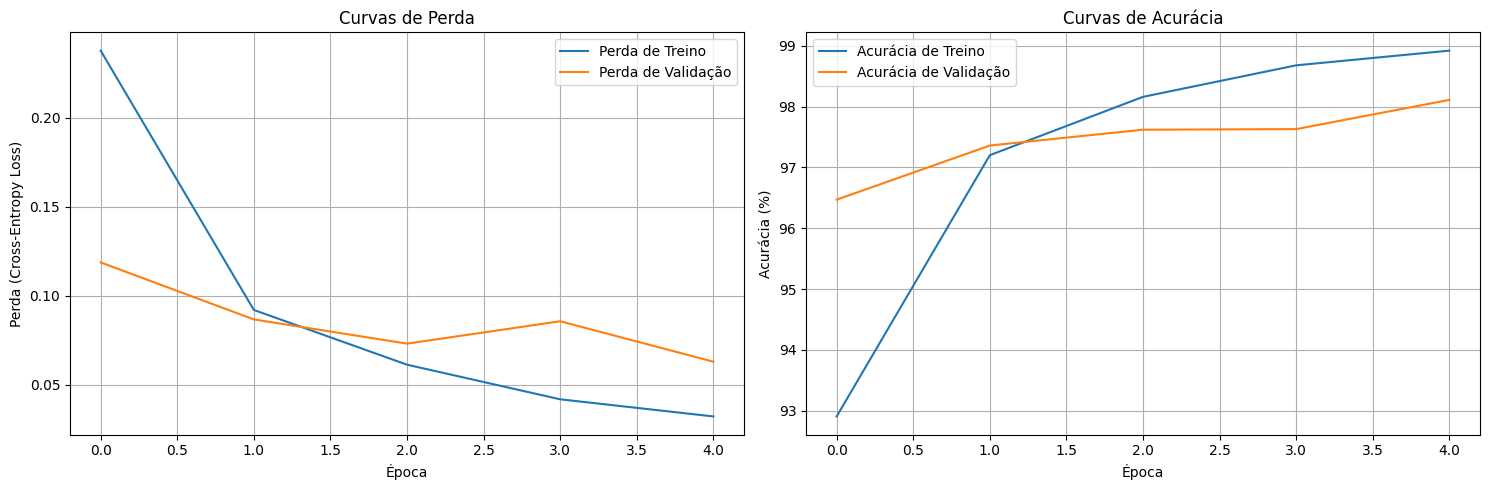

In [18]:
# Criando os plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot da Curva de Perda
axs[0].plot(train_losses, label='Perda de Treino')
axs[0].plot(val_losses, label='Perda de Validação')
axs[0].set_title("Curvas de Perda")
axs[0].set_xlabel("Época")
axs[0].set_ylabel("Perda (Cross-Entropy Loss)")
axs[0].legend()
axs[0].grid(True)

# Plot da Curva de Acurácia
axs[1].plot(train_accuracies, label='Acurácia de Treino')
axs[1].plot(val_accuracies, label='Acurácia de Validação')
axs[1].set_title("Curvas de Acurácia")
axs[1].set_xlabel("Época")
axs[1].set_ylabel("Acurácia (%)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Avaliação do Modelo

Após o treinamento, é fundamental avaliar a performance do modelo em dados que ele nunca viu, ou seja, o conjunto de teste. Durante a avaliação, não precisamos calcular gradientes, o que economiza memória e computação. Para isso, usamos o contexto `torch.no_grad()`.

In [19]:
# Colocando o modelo em modo de avaliação (desativa camadas como Dropout, se houver)
model.eval()

# O contexto torch.no_grad() desabilita o cálculo de gradientes
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # A classe com o maior logit é a previsão
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Acurácia do modelo no dataset de teste: {100 * correct / total:.2f} %')

Acurácia do modelo no dataset de teste: 98.11 %


### Exercícios

#### Exercício 1: Praticando com o `autograd`

Calcule os gradientes da função $L = 2a^3 + 3b^2$ em relação a `a` e `b`.

1.  Defina dois tensores, `a` e `b`, com os valores `a=2.0` e `b=5.0`. Lembre-se de definir `requires_grad=True`.
2.  Escreva a operação em PyTorch para calcular `L`.
3.  Use `.backward()` para calcular os gradientes.
4.  Imprima `a.grad` e `b.grad`.
5.  **Verificação:** Calcule as derivadas parciais $\frac{\partial L}{\partial a}$ e $\frac{\partial L}{\partial b}$ manualmente e confirme se os resultados correspondem aos do PyTorch.

In [4]:
import torch

a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(5.0, requires_grad=True)

L = 2*(a**3)+3*(b**2)

L.backward()

In [5]:
print(a.grad)
print(b.grad)

tensor(24.)
tensor(30.)


Derivada parcial de L em relação a "a":
 $\frac{\partial L}{\partial a} = 6a^2 = 24$ ✔️

Derivada parcial de L em relação a "b":
 $\frac{\partial L}{\partial b} = 6b = 30$ ✔️

#### Exercício 2: Aprofundando a Arquitetura da Rede

Modifique a classe `NeuralNetwork` para que ela tenha **duas camadas ocultas** em vez de uma. A nova arquitetura deve ser:
`Entrada (784) -> Camada Linear (256 neurônios) -> ReLU -> Camada Linear (128 neurônios) -> ReLU -> Saída (10 neurônios)`. Em seguida, treine o novo modelo e compare com as curvas de treinamento do modelo original.

In [20]:

class NeuralNetworkNova(nn.Module):
    def __init__(self, input_size=784, hidden1=256, hidden2=128, num_classes=10):
        super(NeuralNetworkNova, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


model = NeuralNetworkNova()


In [21]:
# Hiperparâmetros
num_epochs = 5
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
learning_rate = 0.001

# Dispositivo (GPU se disponível, senão CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando o dispositivo: {device}")

# Instanciando o modelo, função de custo e otimizador e movendo o modelo para o dispositivo
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Listas para armazenar as métricas de cada época
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Loop de treinamento
for epoch in range(num_epochs):
    # --- Treinamento ---
    model.train() # Coloca o modelo em modo de treinamento
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    progress_bar_train = tqdm(train_loader, desc=f'Época [{epoch+1}/{num_epochs}] Treino')

    for images, labels in progress_bar_train:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calcula a acurácia de treino
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        progress_bar_train.set_postfix({'Perda Treino': f'{loss.item():.4f}'})

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # --- Validação ---
    model.eval() # Coloca o modelo em modo de avaliação
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    progress_bar_val = tqdm(test_loader, desc=f'Época [{epoch+1}/{num_epochs}] Validação')

    with torch.no_grad(): # Desabilita o cálculo de gradientes
        for images, labels in progress_bar_val:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            # Calcula a acurácia de validação
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            progress_bar_val.set_postfix({'Perda Val': f'{loss.item():.4f}'})

    epoch_val_loss = running_val_loss / len(test_loader)
    epoch_val_acc = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f'Fim da Época [{epoch+1}/{num_epochs}] | '
          f'Perda Treino: {epoch_train_loss:.4f}, Acurácia Treino: {epoch_train_acc:.2f}% | '
          f'Perda Validação: {epoch_val_loss:.4f}, Acurácia Validação: {epoch_val_acc:.2f}%')

print("\nTreinamento concluído!")

Usando o dispositivo: cpu


Época [1/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [1/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [1/5] | Perda Treino: 0.2321, Acurácia Treino: 93.20% | Perda Validação: 0.1198, Acurácia Validação: 96.26%


Época [2/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [2/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [2/5] | Perda Treino: 0.0888, Acurácia Treino: 97.30% | Perda Validação: 0.0804, Acurácia Validação: 97.56%


Época [3/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [3/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [3/5] | Perda Treino: 0.0582, Acurácia Treino: 98.19% | Perda Validação: 0.0786, Acurácia Validação: 97.61%


Época [4/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [4/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [4/5] | Perda Treino: 0.0417, Acurácia Treino: 98.64% | Perda Validação: 0.0706, Acurácia Validação: 97.77%


Época [5/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [5/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [5/5] | Perda Treino: 0.0304, Acurácia Treino: 99.00% | Perda Validação: 0.0662, Acurácia Validação: 98.05%

Treinamento concluído!


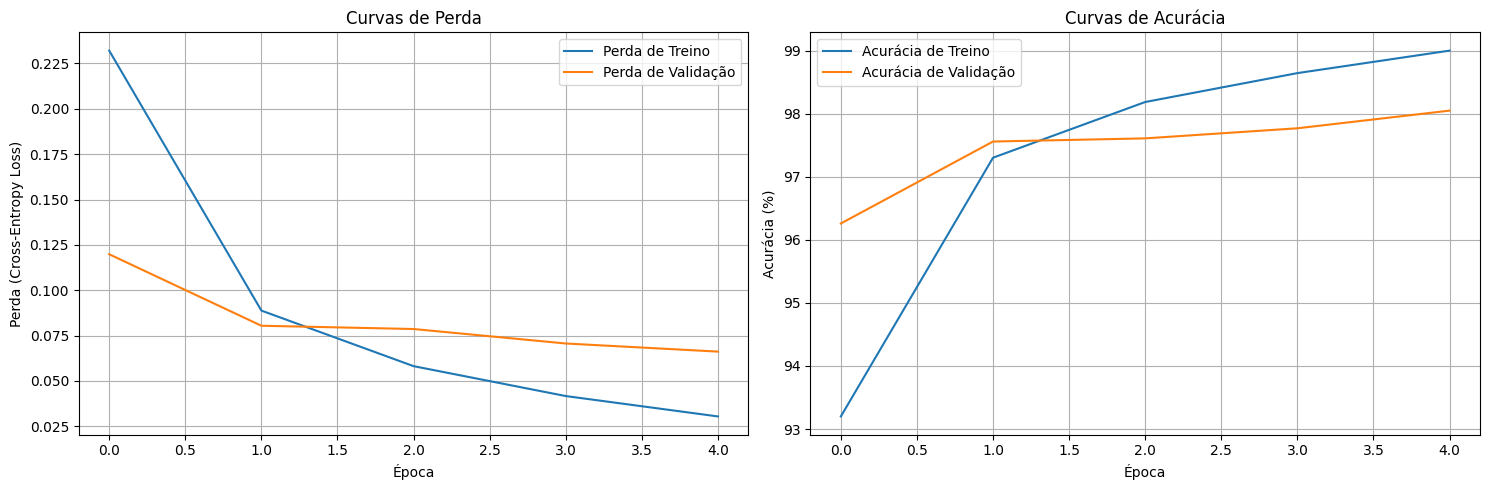

In [22]:
# Criando os plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot da Curva de Perda
axs[0].plot(train_losses, label='Perda de Treino')
axs[0].plot(val_losses, label='Perda de Validação')
axs[0].set_title("Curvas de Perda")
axs[0].set_xlabel("Época")
axs[0].set_ylabel("Perda (Cross-Entropy Loss)")
axs[0].legend()
axs[0].grid(True)

# Plot da Curva de Acurácia
axs[1].plot(train_accuracies, label='Acurácia de Treino')
axs[1].plot(val_accuracies, label='Acurácia de Validação')
axs[1].set_title("Curvas de Acurácia")
axs[1].set_xlabel("Época")
axs[1].set_ylabel("Acurácia (%)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Colocando o modelo em modo de avaliação (desativa camadas como Dropout, se houver)
model.eval()

# O contexto torch.no_grad() desabilita o cálculo de gradientes
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # A classe com o maior logit é a previsão
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Acurácia do modelo no dataset de teste: {100 * correct / total:.2f} %')

Acurácia do modelo no dataset de teste: 98.05 %


#### Exercício 3: Otimizadores e Taxa de Aprendizado

Altere a taxa de aprendizado no loop de treinamento. Utilize valores maiores (como `lr=1.0`) e menores (como `lr=0.0001`) do que o original. Como as curvas de treinamento se comportaram em cada ocasião?

In [25]:
def train_plot(num_epochs, input_size, hidden_size, num_classes, learning_rate):
    # Dispositivo (GPU se disponível, senão CPU)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Usando o dispositivo: {device}")

    # Instanciando o modelo, função de custo e otimizador e movendo o modelo para o dispositivo
    model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Listas para armazenar as métricas de cada época
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Loop de treinamento
    for epoch in range(num_epochs):
        # --- Treinamento ---
        model.train() # Coloca o modelo em modo de treinamento
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        progress_bar_train = tqdm(train_loader, desc=f'Época [{epoch+1}/{num_epochs}] Treino')

        for images, labels in progress_bar_train:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward e otimização
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calcula a acurácia de treino
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            progress_bar_train.set_postfix({'Perda Treino': f'{loss.item():.4f}'})

        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_acc = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)

        # --- Validação ---
        model.eval() # Coloca o modelo em modo de avaliação
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        progress_bar_val = tqdm(test_loader, desc=f'Época [{epoch+1}/{num_epochs}] Validação')

        with torch.no_grad(): # Desabilita o cálculo de gradientes
            for images, labels in progress_bar_val:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                # Calcula a acurácia de validação
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                progress_bar_val.set_postfix({'Perda Val': f'{loss.item():.4f}'})

        epoch_val_loss = running_val_loss / len(test_loader)
        epoch_val_acc = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)

        print(f'Fim da Época [{epoch+1}/{num_epochs}] | '
              f'Perda Treino: {epoch_train_loss:.4f}, Acurácia Treino: {epoch_train_acc:.2f}% | '
              f'Perda Validação: {epoch_val_loss:.4f}, Acurácia Validação: {epoch_val_acc:.2f}%')

    print("\nTreinamento concluído!")

        # Criando os plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot da Curva de Perda
    axs[0].plot(train_losses, label='Perda de Treino')
    axs[0].plot(val_losses, label='Perda de Validação')
    axs[0].set_title("Curvas de Perda")
    axs[0].set_xlabel("Época")
    axs[0].set_ylabel("Perda (Cross-Entropy Loss)")
    axs[0].legend()
    axs[0].grid(True)

    # Plot da Curva de Acurácia
    axs[1].plot(train_accuracies, label='Acurácia de Treino')
    axs[1].plot(val_accuracies, label='Acurácia de Validação')
    axs[1].set_title("Curvas de Acurácia")
    axs[1].set_xlabel("Época")
    axs[1].set_ylabel("Acurácia (%)")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

Usando o dispositivo: cpu


Época [1/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [1/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [1/5] | Perda Treino: 347.6822, Acurácia Treino: 21.81% | Perda Validação: 3.0859, Acurácia Validação: 12.86%


Época [2/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [2/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [2/5] | Perda Treino: 3.3971, Acurácia Treino: 16.20% | Perda Validação: 2.7375, Acurácia Validação: 10.61%


Época [3/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [3/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [3/5] | Perda Treino: 3.6688, Acurácia Treino: 10.53% | Perda Validação: 2.8157, Acurácia Validação: 10.50%


Época [4/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [4/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [4/5] | Perda Treino: 2.3314, Acurácia Treino: 11.01% | Perda Validação: 2.8409, Acurácia Validação: 10.04%


Época [5/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [5/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [5/5] | Perda Treino: 2.3305, Acurácia Treino: 11.01% | Perda Validação: 2.7568, Acurácia Validação: 11.17%

Treinamento concluído!


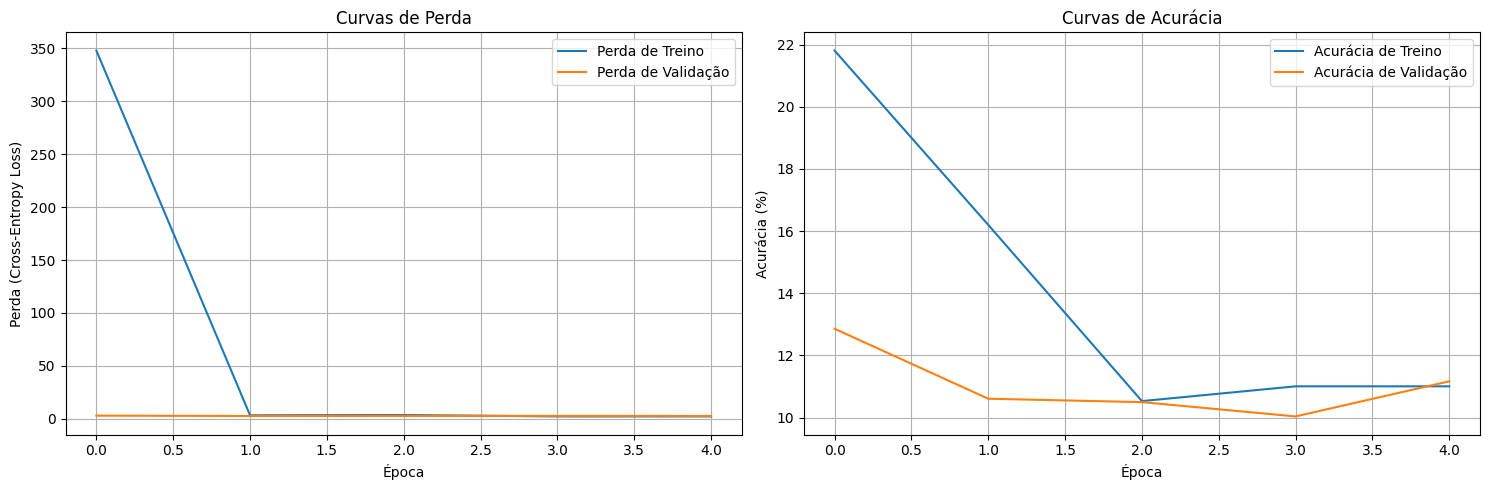

In [26]:
train_plot(num_epochs, input_size, hidden_size, num_classes, 1.0)

Foi observado que a acurácia ao contrário de melhorar, ela piorou porque com LR muito alta, o treinamento não consegue ser atualizado com precisão suficiente para diminuir a sua loss. Logo nunca chega em um ponto de vale da sua losslandscape.

Usando o dispositivo: cpu


Época [1/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [1/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [1/5] | Perda Treino: 4.0168, Acurácia Treino: 55.41% | Perda Validação: 1.1365, Acurácia Validação: 64.62%


Época [2/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [2/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [2/5] | Perda Treino: 1.4470, Acurácia Treino: 51.85% | Perda Validação: 1.6188, Acurácia Validação: 51.00%


Época [3/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [3/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [3/5] | Perda Treino: 1.5033, Acurácia Treino: 47.50% | Perda Validação: 1.6637, Acurácia Validação: 36.74%


Época [4/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [4/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [4/5] | Perda Treino: 1.6905, Acurácia Treino: 35.30% | Perda Validação: 1.9913, Acurácia Validação: 24.03%


Época [5/5] Treino:   0%|          | 0/469 [00:00<?, ?it/s]

Época [5/5] Validação:   0%|          | 0/79 [00:00<?, ?it/s]

Fim da Época [5/5] | Perda Treino: 1.6883, Acurácia Treino: 36.25% | Perda Validação: 1.6791, Acurácia Validação: 36.11%

Treinamento concluído!


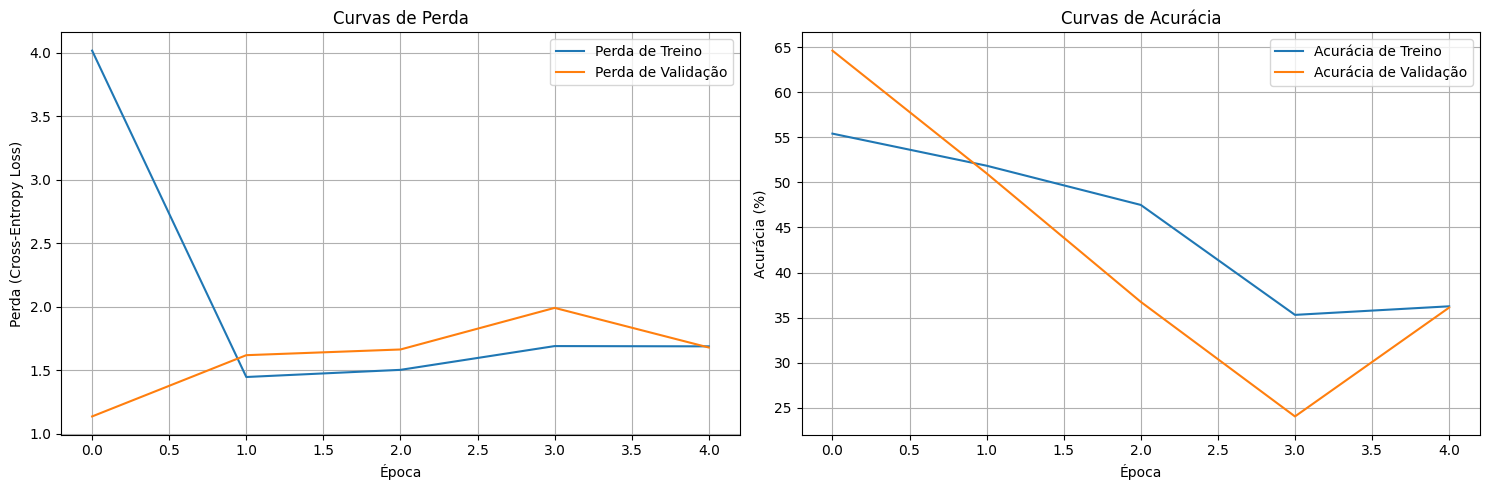

In [27]:
train_plot(num_epochs, input_size, hidden_size, num_classes, 000.1)

Nessa situação, a learning rate muito baixa,o modelo demora muito para convergir, portanto, não há épocas suficientes para o modelo explorar e melhorar a sua acurácia, assim ela se mantém em níveis muito baixos.

#### Exercício 4: Criando um Dataset para Regressão

Crie uma classe de `Dataset` customizada para um problema de regressão simples. O dataset deve gerar dados sintéticos onde `y` é uma função linear de `x` com um pouco de ruído.

Crie uma classe `RegressionDataset` que herde de `torch.utils.data.Dataset`. No `__init__`, crie um tensor `X` com 1000 pontos aleatórios entre -10 e 10 e crie um tensor `y` correspondente usando a fórmula $y = 5x - 3 + \text{ruído}$ (use `torch.randn` para o ruído). Implemente os métodos `__len__` e `__getitem__` e use um `DataLoader` para extrair o primeiro lote (batch). Imprima o formato dos tensores de features e labels do lote para confirmar que seu pipeline de dados está funcionando corretamente.

In [40]:
class RegressionDataset(torch.utils.data.Dataset):
    def __init__(self, n_samples=1000):
        super().__init__()
        self.x = torch.rand(n_samples, 1) * 20 - 10
        self.noise = torch.randn(n_samples, 1)
        self.y = 5 * self.x - 3 + self.noise
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


In [41]:
from torch.utils.data import DataLoader

x = RegressionDataset()

data_loader = DataLoader(dataset=x, batch_size=10, shuffle=True)

first_batch_features, first_batch_labels = next(iter(data_loader))

print(f"Formato do batch de features: {first_batch_features.shape}")
print(f"Formato do batch de rótulos: {first_batch_labels.shape}")

Formato do batch de features: torch.Size([10, 1])
Formato do batch de rótulos: torch.Size([10, 1])
